<a href="https://colab.research.google.com/github/aweier/aweier/blob/main/Copy_of_2_Queue_(hw_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulation of a Queue

## A queue with no randomness
Let us first consider a service system (queue) without any randomness. A job arrives exactly every 2 minutes, and needs exactly 2 minutes of service. So, the inter-arrival times for the jobs are $u_1=u_2=....=2$ and the service times are $v_1=v_2=....=2$. Then the arrival rate is $\lambda=1/2$ and $m=2$ and so the traffic intensity is $\rho=1$. We know that the waiting time here is zero. Let's simulate and see this. We will run the simulation for $n$ jobs.

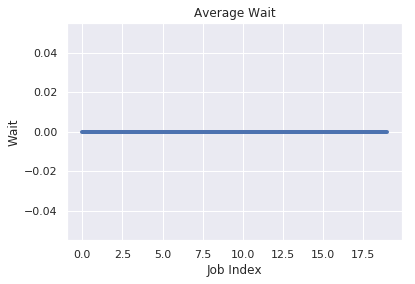

In [ ]:
#Importing required Python packages
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns #To make the plots look better
sns.set()


n=20 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes
v= 2*np.ones(n) #Fixed service times of 2 minutes

#Simulating the queue wait times using Lindley's equations

w = np.zeros(n) #Initializing the waiting times vector

for i in range(n-1):
    w[i+1]=max(w[i]+v[i]-u[i+1],0) #Lindley's equations

plt.figure(1)
plt.plot(range(n), w, 'b',linewidth=4, markersize=12)
plt.xlabel('Job Index')
plt.ylabel('Wait')
plt.title('Average Wait')
plt.grid(True)
plt.show()

Nothing very interesting is going on.

## A critically loaded queue with random service times

Now, let us introduce some randomness and see how the delay changes. Let's keep the traffic intensity at $\rho=1$. We have studied in the class that in this case the average waiting time goes to infinity. Let us see how this happend. We will use simple uniform randome variables to introduce randomness in service times. The service times are assumed to be uniform over [1.9,2.1] so that the mean is still 2. (The code below is same as above except for (i) randomness in service times and (ii)serrvice time is included in the figure as well)

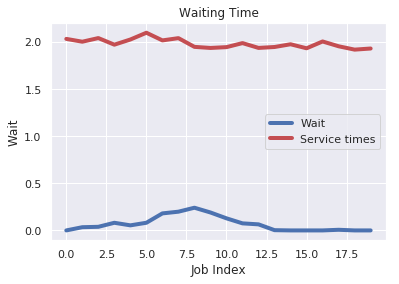

In [ ]:
n=20 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes
v = np.random.uniform(1.9,2.1,n) #Uniform over [1.9,2.1]


#Simulating the queue wait times using Lindley's equations

w = np.zeros(n) #Initializing the waiting times vector

for i in range(n-1):
    w[i+1]=max(w[i]+v[i]-u[i+1],0) #Lindley's equations


plt.figure(1)

plt.plot(range(n), w,'b', label='Wait', linewidth=4, markersize=12)
plt.plot(range(n), v,'r', label='Service times', linewidth=4, markersize=12)
plt.xlabel('Job Index')
plt.ylabel('Wait')
plt.legend()
plt.title('Waiting Time')
plt.grid(True)

plt.show()



The orange line shows the service times. We notice that whenever the service times are more than $2$, the waiting time slightly increases for the following job. If there are sequence of more than two service times, the waiting times for the following jobs keeps on increasing. The only way the wating times decrease is when there are a bunch of service times that are smaller than $2$, which may happen after some time and the waiting time comes to zero. But this is not sustainable. As we have more and more users, the waiting times compund and start quickly increasing.

We have been looking only at the wait of each of the jobs. Let us also plot and see how the average waiting time (The average of waiting times of teh first $i$ jobs) changes. The following code has command for calculating running average for waiting times. Inorder to make sure that the code runs fast, 'convolve' command is used to calculate running average instead of doing in the straight forward manner.

Try running this for $n=20,50,100,1000,10000, 100000, 1000000$ jobs.


In [ ]:
n=1000 #Number of jobs
u= np.random.exponential(scale=2.5, size=None) # Exponentially distributed Inter-arrival times of mean .4 minutes (1/.4=2.5)
v = np.random.gamma(2, scale=1.0, size=None) #gamma distribution, shape 2, rate param. 1

#Simulating the queue wait times using Lindley's equations

w = np.zeros(n) #Initializing the waiting times vector
w_avg = np.zeros(n) #Initializing the average waiting times vector

for i in range(n-1):
    w[i+1]=max(w[i]+v[i]-u[i+1],0) #Lindley's equations
    #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average

plt.figure(1)

plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
plt.plot(range(n), v, 'r', label='Service time', linewidth=1, markersize=12)
plt.plot(range(n), w_avg, 'g', label='Average Waiting', linewidth=4, markersize=12)
plt.xlabel('Job Index')
#plt.ylabel('Wait')
plt.legend()
plt.title('Waiting Time')
plt.grid(True)

plt.show()

TypeError: ignored

We see that the waiting times come back to zero once in a while. We also notice that the longer the simulation runs for, the larger are the excurisons of the waiting times. Even though the waiting times zome back to zero after some excursions, the average waiting time keeps on increasing. It goes to infinity if we let $n$ go to infinity, and so that queue is unstable. This is consistent with Kingman's formula. When we have non-zero variance and $\rho$ approaches one, Kingman's approximation blows up to $\infty$.

## A Stable Queue

Now that we saw that the queue is unstable when $\rho=1$, let's see how the queue looks for $\rho<1$. Let's pick the service times to be uniform on [1.8,2.0]. so that the mean is 1.9 and so $\lambda = 1.9/2$ and so $\rho=0.95$. What do you think will happen? Change the values in the code above and check what happens.

Why is this? (Select this line to see: <span style="color:white">because the service times are atmost 2, every job finishes before the enxt job arrives.</span>)

To keep it interesting, let's pick service times to be uniform on [1.7,2.1 ] instead, so that the mean is 1.9 and so $\lambda = 1.9/2$ and so $\rho=0.95$. The code beloe does that.

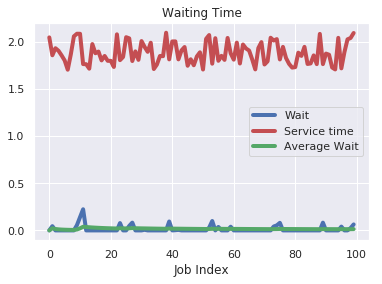

In [ ]:
n=100 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes
v = np.random.uniform(1.7,2.1,n) #Uniform over [1.9,2.1]

#Simulating the queue wait times using Lindley's equations

w = np.zeros(n) #Initializing the waiting times vector
w_avg = np.zeros(n) #Initializing the average waiting times vector

for i in range(n-1):
    w[i+1]=max(w[i]+v[i]-u[i+1],0) #Lindley's equations
    #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average

plt.figure(1)

plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
plt.plot(range(n), v, 'r', label='Service time', linewidth=4, markersize=12)
plt.plot(range(n), w_avg, 'g', label='Average Wait', linewidth=4, markersize=12)
plt.xlabel('Job Index')
#plt.ylabel('Wait')
plt.legend()
plt.title('Waiting Time')
plt.grid(True)

plt.show()



We see that the delay is almost negligible. We understand that high variability causes higher delays. What is the variance of the service process above? (Highlight below to see)
<span style="color:white">It is $(2.1-1.7)^2/12$ which is 0.01333.</span>

Since this variance is very small, we have small delays. We want to see what happens if we increase variance. In order to study this, we want to keep mean service rate fixed and change variance. It becomes harder to do this with uniform distribution. So, let's pick gamma distibution for service times. Gamma distribution has two parameters $k$ and $\theta$. Its mean is $k\theta$ and variance is $k\theta^2$. Since there are two parameters, it is easy to pick these parameters so that the mean and variance can be made to equal arbitrary positive value. Let's pick $k=10$ and $\theta=.19$ so that mean is $1.9$ and variance is $0.361$.
Let's first generate the sample service times, and calculate their empirical mean and varaince belo.

In [ ]:
n=10000 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes
v = np.random.gamma(10,0.19,n) #Uniform over [1.9,2.1]
np.mean(v)


1.9024121996588064

In [ ]:
np.var(v)

0.36209527151817017

These are quite close to the calculated mean and variance. Let us rerun the code above for the queue using these service times

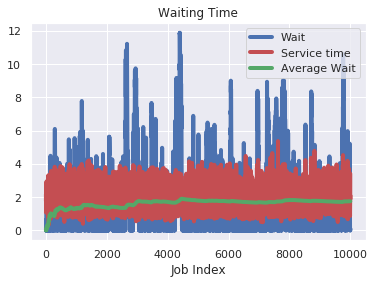

In [ ]:
w = np.zeros(n)
for i in range(n-1):
    w[i+1]=max(w[i]+v[i]-u[i+1],0)
    #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average

plt.figure(1)

plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
plt.plot(range(n), v, 'r', label='Service time', linewidth=4, markersize=12)
plt.plot(range(n), w_avg, 'g', label='Average Wait', linewidth=4, markersize=12)
plt.xlabel('Job Index')
#plt.ylabel('Wait')
plt.legend()
plt.title('Waiting Time')
plt.grid(True)

plt.show()

Well. Here the waiting times are larger than before. That is because the variance is high. We also notice here that the average waiting time is converging to a value after a while. Let's pick different values of variance and fix the mean to be at 1.9  and see how the average waitingtime changes. Since we are now looking at multiple simulations in the same plot, we will only display the average waiting times.

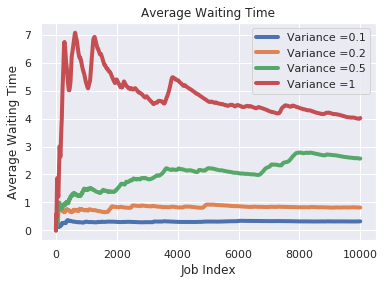

In [ ]:
n=10000 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes

plt.figure(1)
Variance_values = [0.1,0.2,0.5,1]
w_avg_final = np.zeros(np.shape(Variance_values))
j=0
for varian in Variance_values:
    theta=varian/1.9
    k=1.9/theta

    v = np.random.gamma(k,theta,n) #Uniform over [1.9,2.1]

    for i in range(n-1):
        w[i+1]=max(w[i]+v[i]-u[i+1],0)
        #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

    w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average


    #plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
    #plt.plot(range(n), v, 'r', label='Service time', linewidth=4, markersize=12)
    plt.plot(range(n), w_avg, label='Variance ='+str(varian), linewidth=4, markersize=12)

    w_avg_final[j]=w_avg[n-1]
    j=j+1

plt.xlabel('Job Index')
plt.ylabel('Average Waiting Time')
plt.legend()
plt.title('Average Waiting Time')
plt.grid(True)

plt.show()

Again the average waiting times saturate. We notice that the average waiting time increases with the variance. We also notice that these eventual average waiting times are proportional to the variance. When we look at the Kingman's formula and change only variance keeping the eman service times and traffic internsity fixed, we will see that the average waiting time is proportional to the variance (when the variance in the arrivals is zero). Let's make sure that this relationship is indeed proportional i.e., linear. Now, we will plot the variance vs the average waiting time at the end of the previous simulation.

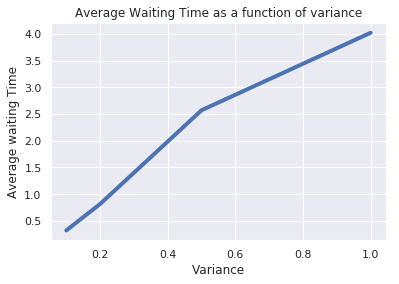

In [ ]:
plt.figure()
plt.plot(Variance_values, w_avg_final, linewidth=4, markersize=12)
plt.xlabel('Variance')
plt.ylabel('Average waiting Time')
plt.title('Average Waiting Time as a function of variance')
plt.grid(True)
plt.show()

This is indeed linear. Let us now look at the dependance on the traffic intensity. We will now fix variance and vary the mean service times so that the load changes.

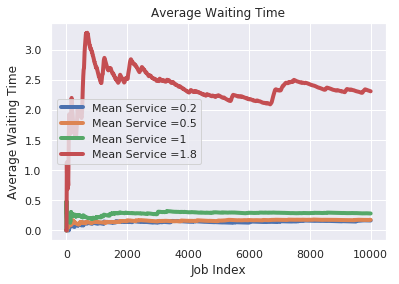

In [ ]:
n=10000 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes

plt.figure(1)
Varian=.5

mean_serv_values = [0.2,0.5,1,1.8]
w_avg_final = np.zeros(np.shape(mean_serv_values))
j=0
for mean_service in mean_serv_values:
    theta=varian/mean_service
    k=mean_service/theta

    v = np.random.gamma(k,theta,n) #Uniform over [1.9,2.1]

    for i in range(n-1):
        w[i+1]=max(w[i]+v[i]-u[i+1],0)
        #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

    w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average


    #plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
    #plt.plot(range(n), u, 'r', label='Inter-arrival time', linewidth=4, markersize=12)
    plt.plot(range(n), w_avg, label='Mean Service ='+str(mean_service), linewidth=4, markersize=12)

    w_avg_final[j]=w_avg[n-1]
    j=j+1

plt.xlabel('Job Index')
plt.ylabel('Average Waiting Time')
plt.legend()
plt.title('Average Waiting Time')
plt.grid(True)

plt.show()

The average waiting times saturate, which we already observed. But the interesting observation here is that the waiting times are almost same when the mean service times go from $0.2$ to $1$ (equivalently $\rho$ goes from $0.1$ to $0.5$), but increasing drastically when the mean service time is $1.8$ ($\rho$ is 0.9). Why is this?

Let's now plot the average waiting time at the end of all these jobs vs the traffic internsity, and let's do this for more values of $\rho$ so that we can see what's going on.

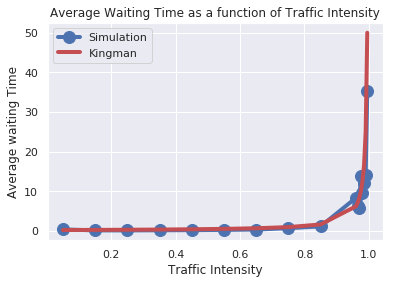

In [ ]:
n=10000 #Number of jobs
u= 2*np.ones(n) # Fixed Inter-arrival times of 2 minutes
w = np.zeros(n)

Varian=.5

mean_serv_values = np.asarray(list(np.arange(0.1,1.9,0.2))+list(np.arange(1.92,1.99,.01)))
#mean_serv_values = np.asarray(list(np.arange(0.1,1.7,0.2)))
w_avg_final = np.zeros(np.shape(mean_serv_values))
j=0
for mean_service in mean_serv_values:
    w = np.zeros(n)
    theta=varian/mean_service
    k=mean_service/theta

    v = np.random.gamma(k,theta,n) #Uniform over [1.9,2.1]

    for i in range(n-1):
        w[i+1]=max(w[i]+v[i]-u[i+1],0)
        #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

    #w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average


    w_avg_final[j]=np.mean(w)
    j=j+1

plt.figure()
rho=mean_serv_values/2
plt.plot(rho, w_avg_final, 'bo-',label='Simulation',linewidth=4, markersize=12)
kingman = (varian/4)/(1-rho) #Kingman's formula reduces to this in this case
plt.plot(rho, kingman, 'r',label='Kingman',linewidth=4, markersize=12)
plt.xlabel('Traffic Intensity')
plt.ylabel('Average waiting Time')
plt.title('Average Waiting Time as a function of Traffic Intensity')
plt.grid(True)
plt.legend()
plt.show()

The blue curve here is from simulation. The red curve is from Kingman's formula. We notice that the waiting times are very small for $\rho<0.8$, and thenr apidly go to infinity. The key take away from this exercise is that we should never operate our queueing systems in a regime where $\rho$ is close to $1$.

Even though both the curves overlap on each other, its not clear how good the approximation is when the waiting times are small. Rerun the above code so that the plot shows only up to $\rho<0.8$.

We now see that there is a gap. But this is not very important because the waiting times are quite small. Also, we notice that the kingman bound is always an upper bound of the waiting time. It is never below the actual average waiting times.

Plot the error in the Kingman's formula as a function of traffic intensity, $\rho$. Does it increase for alrge $\rho$ or decrease? Plot the relative error, i.e., the ratio of Kingman error and the actual queue length. Does that increase or deacrease?

In [ ]:
n=10000 #Number of jobs
u= np.random.exponential(.4) # exponential Inter-arrival times of mean .4 minutes

plt.figure(1)
Variance_values = [0.1,0.2,0.5,1]
w_avg_final = np.zeros(np.shape(Variance_values))
j=0
for varian in Variance_values:
    theta=varian/1.9
    k=1.9/theta

    v = np.random.gamma(k,theta,n) #Uniform over [1.9,2.1]

    for i in range(n-1):
        w[i+1]=max(w[i]+v[i]-u[i+1],0)
        #w_avg[i+1]=np.mean(w[0:i+1]) #This is slow

    w_avg = np.convolve(w, np.ones((n,)))[0:n]/np.arange(1,n+1) #This is a fast way of calculating running average


    #plt.plot(range(n), w, 'b', label='Wait', linewidth=4, markersize=12)
    #plt.plot(range(n), v, 'r', label='Service time', linewidth=4, markersize=12)
    plt.plot(range(n), w_avg, label='Variance ='+str(varian), linewidth=4, markersize=12)

    w_avg_final[j]=w_avg[n-1]
    j=j+1

plt.xlabel('Job Index')
plt.ylabel('Average Waiting Time')
plt.legend()
plt.title('Average Waiting Time')
plt.grid(True)

plt.show()

TypeError: ignored

<Figure size 432x288 with 0 Axes>